In [3]:
import networkx as nx
import dzcnapy_plotlib as dzcnapy

In [4]:
G = nx.Graph([("A", "eggs"),])

G.add_node("spinach") # Add a single node

G.add_node("Hg") # Add a single node by mistake

G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes

G.add_edge("spinach", "folates") # Add one edge, both ends exist

G.add_edge("spinach", "heating oil") # Add one edge by mistake

G.add_edge("liver", "Se") # Add one edge, one end does not exist

G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])

In [5]:
G.remove_node("Hg")

G.remove_nodes_from(["Hg",]) # Safe to remove a missing node using a list

G.remove_edge("spinach", "heating oil")

G.remove_edges_from([("spinach", "heating oil"), ]) # See above

G.remove_node("heating oil") # Not removed yet

* You can use the method G.clear() to delete all graph nodes and edges at once
but keep the graph shell.

In [6]:
print(G.nodes(data=True))

[('A', {}), ('eggs', {}), ('spinach', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('Se', {})]


In [7]:
print(G.edges(data=True))

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


In [8]:
# the number of nodes 
print(len(G.nodes()))

# alternative way to get number of nodes
print(len(G))

# the number of edges
print(len(G.edges()))

7
7
5


### Read a Network from a CSV File

In [9]:
import matplotlib.pyplot as plt
import csv

with open("Data/code/nutrients.csv") as infile:

    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())
print(G.edges())
print(len(G))
print(len(G.edges()))

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']
[('A', 'carrots'), ('A', 'eggs'), ('A', 'fatty fish'), ('A', 'green leafy vegs'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('fatty fish', 'B6'), ('fatty fish', 'D'), ('fatty fish', 'B12'), ('fatty fish', 'niacin'), ('green leafy vegs', 'Mn'), ('green leafy vegs', 'C'), ('green leafy vegs', 'Ca'), ('green leafy vegs', 'E'), ('green leafy vegs', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'), ('milk', 'D'), ('milk', 'Ca'), ('milk', 'riboflavin'), ('tomat

In [10]:
# identifying self-loops 

loops = list(nx.selfloop_edges(G))
print(loops)

[('tomatoes', 'tomatoes')]


In [11]:
# removing self-loops edges

G.remove_edges_from(loops)
loops = list(nx.selfloop_edges(G))
loops

[]

### Relabel Nodes

`nx.relabel_nodes()` that takes a graph and a dictionary of old and new labels and either creates a relabeled copy of the graph (copy=True, default) or modifies the graph in place (use the latter option if the graph is large and you don’t plan to keep the original graph). Each dictionary key must be an existing node label, but some labels may be missing. The respective nodes will not be relabeled.

We will use dictionary comprehension to walk through all network nodes and capitalize node names.

* Graph is a node iterator. In fact, "G" has some other dict() features. For example, you can use selection operator []
to access the ***edges incident to the node***, and their attributes:

In [12]:
print(G["A"])

{'carrots': {}, 'eggs': {}, 'fatty fish': {}, 'green leafy vegs': {}, 'liver': {}, 'milk': {}, 'tomatoes': {}}


In [67]:
# create a dictionary old node names as key and new node names as values  

mapping = {node: node.title() for node in G if isinstance(node, str)}
print(mapping)

{'A': 'A', 'B12': 'B12', 'B6': 'B6', 'C': 'C', 'Ca': 'Ca', 'Cu': 'Cu', 'D': 'D', 'E': 'E', 'Mn': 'Mn', 'Se': 'Se', 'Zn': 'Zn', 'Carrots': 'Carrots', 'Eggs': 'Eggs', 'Fatty Fish': 'Fatty Fish', 'Green Leafy Vegs': 'Green Leafy Vegs', 'Liver': 'Liver', 'Milk': 'Milk', 'Tomatoes': 'Tomatoes', 'Asparagus': 'Asparagus', 'Beans': 'Beans', 'Kidneys': 'Kidneys', 'Potatoes': 'Potatoes', 'Pumpkins': 'Pumpkins', 'Broccoli': 'Broccoli', 'Cheese': 'Cheese', 'Nuts': 'Nuts', 'Whole Grains': 'Whole Grains', 'Mushrooms': 'Mushrooms', 'Seeds': 'Seeds', 'Legumes': 'Legumes', 'Wheat': 'Wheat', 'Beef': 'Beef', 'Riboflavin': 'Riboflavin', 'Niacin': 'Niacin', 'Folates': 'Folates', 'Spinach': 'Spinach', 'Poultry': 'Poultry', 'Shellfish': 'Shellfish', 'Thiamin': 'Thiamin', 'Veg Oils': 'Veg Oils', 'Yogurt': 'Yogurt'}


In [14]:
# capitalize all node names

nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


## Add Attributes

A node or edge attribute describes its non-structural properties. An attribute is implemented as a dictionary associated with the node or edge. The dictionary keys are attribute names. As such, they must be immutable: int(), float(), bool(), str(), and so on. There are no limitations on the values.

* Let’s create
a boolean attribute "nutrient" that is true for nutrients and false for foods.

In [15]:
# nutrient list
# converted into set that have constant lookup time.
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
"Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))

# create a dictionary shows whether it is a nutrient or food
nutrient_dict = {node: (node in nutrients) for node in G}
print(nutrient_dict)

{'A': True, 'B12': True, 'B6': True, 'C': True, 'Ca': True, 'Cu': True, 'D': True, 'E': True, 'Mn': True, 'Se': True, 'Zn': True, 'Carrots': False, 'Eggs': False, 'Fatty Fish': False, 'Green Leafy Vegs': False, 'Liver': False, 'Milk': False, 'Tomatoes': False, 'Asparagus': False, 'Beans': False, 'Kidneys': False, 'Potatoes': False, 'Pumpkins': False, 'Broccoli': False, 'Cheese': False, 'Nuts': False, 'Whole Grains': False, 'Mushrooms': False, 'Seeds': False, 'Legumes': False, 'Wheat': False, 'Beef': False, 'Riboflavin': True, 'Niacin': True, 'Folates': True, 'Spinach': False, 'Poultry': False, 'Shellfish': False, 'Thiamin': True, 'Veg Oils': False, 'Yogurt': False}


In [16]:
# create a boolean attribute "nutrient" that is true for nutrients and false for foods

nx.set_node_attributes(G, nutrient_dict, "nutrient")
print(G.nodes(data=True))

[('A', {'nutrient': True}), ('B12', {'nutrient': True}), ('B6', {'nutrient': True}), ('C', {'nutrient': True}), ('Ca', {'nutrient': True}), ('Cu', {'nutrient': True}), ('D', {'nutrient': True}), ('E', {'nutrient': True}), ('Mn', {'nutrient': True}), ('Se', {'nutrient': True}), ('Zn', {'nutrient': True}), ('Carrots', {'nutrient': False}), ('Eggs', {'nutrient': False}), ('Fatty Fish', {'nutrient': False}), ('Green Leafy Vegs', {'nutrient': False}), ('Liver', {'nutrient': False}), ('Milk', {'nutrient': False}), ('Tomatoes', {'nutrient': False}), ('Asparagus', {'nutrient': False}), ('Beans', {'nutrient': False}), ('Kidneys', {'nutrient': False}), ('Potatoes', {'nutrient': False}), ('Pumpkins', {'nutrient': False}), ('Broccoli', {'nutrient': False}), ('Cheese', {'nutrient': False}), ('Nuts', {'nutrient': False}), ('Whole Grains', {'nutrient': False}), ('Mushrooms', {'nutrient': False}), ('Seeds', {'nutrient': False}), ('Legumes', {'nutrient': False}), ('Wheat', {'nutrient': False}), ('Beef'

### Visualize a Network with Matplotlib

In [17]:
# prepare a color sequence (pink vs. yellow, depending on the node type) for the nodes.


colors = ["yellow" if n[1]["nutrient"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

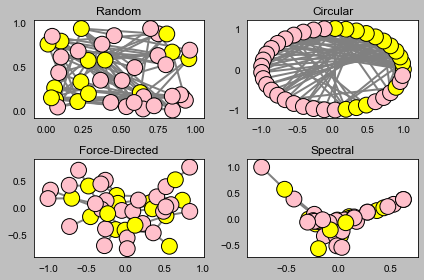

In [18]:
# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout, nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)

dzcnapy.plot("nutrients")

### Harness Graphviz

* graphviz is an open source graph visualization tool
* Due to the better overall layout quality, the node labels have better
chances of not overlapping and should not be disabled

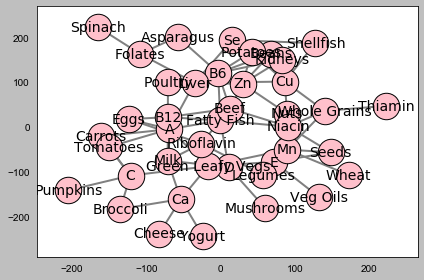

In [68]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.font_manager

_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")

In [20]:
# nx.write_graphml(G, "nutrients.graphml")

nx.write_graphml(G, "nutrients.graphml")

### The degree centrality

A node with more edges, representing, is more important than a node with only one edge.
Degree centrality is local and depends only on the node neighborhood.

In [37]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
print("The degree centarlity scores of vitamin A and Egg are",  dcs["A"], "and", dcs["Eggs"],  "respectively.") 

for n in G.nodes():
    G.nodes[n]['centrality'] = dcs[n]

The degree centarlity scores of vitamin A and Egg are 0.17500000000000002 and 0.07500000000000001 respectively.


### Plotting using nxviz

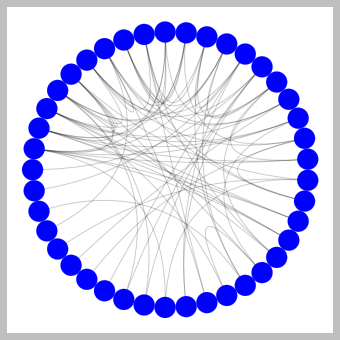

In [43]:
import nxviz as nv

# Create the CircosPlot object: c
c = nv.CircosPlot(G, node_order="centrality")

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

### Comparing the Centralities

This next code calculates eight types of centralities for each node in the network. Each function (except for nx.hits()) returns a dictionary with nodes as keys and centralities as values. nx.hits() returns a list of two dictionaries.

In [47]:
import pandas as pd

dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)

# convert each dictionary into a pd.Series,
# then concatenate all vectors into a pd.DataFrame.
centralities = pd.concat(
[pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
"Harmonic Closeness", "Closeness", "Hubs",
"Degree", "Betweenness")

# normalize the harmonic closeness centrality, because
# it is the only centrality on the list that is not automatically normalized
centralities["Harmonic Closeness"] /= centralities.shape[0]

centralities.head()

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweenness
A,0.045468,0.215499,0.043941,0.489837,0.425532,0.036525,0.175,0.233083
B12,0.039528,0.187343,0.030254,0.404472,0.333333,0.031754,0.125,0.046027
B6,0.070968,0.336336,0.046541,0.462195,0.357143,0.057010,0.200,0.128826
C,0.014093,0.066800,0.038236,0.382520,0.307692,0.011321,0.125,0.085616
Ca,0.016240,0.076975,0.039707,0.401220,0.327869,0.013046,0.125,0.131486


`centralities.corr()` calculates all pairwise correlations between the centralities and
returns an 8×8 symmetric DataFrame. 

In [55]:
import numpy as np

# Calculate the correlations for each pair of centralities
c_df = centralities.corr()

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweenness
Authorities,1.000000,0.986015,0.785535,0.839061,0.756747,0.942166,0.884694,0.601475
Eigenvector,0.986015,1.000000,0.747565,0.845485,0.771771,0.984844,0.855528,0.591443
PageRank,0.785535,0.747565,1.000000,0.916455,0.852822,0.685797,0.980341,0.880526
Harmonic Closeness,0.839061,0.845485,0.916455,1.000000,0.979218,0.827005,0.948021,0.843141
Closeness,0.756747,0.771771,0.852822,0.979218,1.000000,0.764423,0.882320,0.850373
Hubs,0.942166,0.984844,0.685797,0.827005,0.764423,1.000000,0.799722,0.563375
Degree,0.884694,0.855528,0.980341,0.948021,0.882320,0.799722,1.000000,0.844956
Betweenness,0.601475,0.591443,0.880526,0.843141,0.850373,0.563375,0.844956,1.000000


* More than half of the values in the
DataFrame are redundant. Use `np.tri()` from NumPy to generate a lower-left triangular
unit matrix of the proper size and mask the duplicates by multiplying
the DataFrame and the mask matrix element-wise.

In [51]:
ll_triangle = np.tri(c_df.shape[0], k=-1)
ll_triangle

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.]])

In [59]:
c_df *= ll_triangle
c_df

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweenness
Authorities,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Eigenvector,0.986015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
PageRank,0.785535,0.747565,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Harmonic Closeness,0.839061,0.845485,0.916455,0.000000,0.000000,0.000000,0.000000,0.0
Closeness,0.756747,0.771771,0.852822,0.979218,0.000000,0.000000,0.000000,0.0
Hubs,0.942166,0.984844,0.685797,0.827005,0.764423,0.000000,0.000000,0.0
Degree,0.884694,0.855528,0.980341,0.948021,0.882320,0.799722,0.000000,0.0
Betweenness,0.601475,0.591443,0.880526,0.843141,0.850373,0.563375,0.844956,0.0


* Locating the strongest correlations in the table may be hard. Let’s reorganize it
into a tall pd.Series, sort by the values

In [60]:
c_series = c_df.stack()
c_series

Authorities  Authorities           0.000000
             Eigenvector           0.000000
             PageRank              0.000000
             Harmonic Closeness    0.000000
             Closeness             0.000000
                                     ...   
Betweenness  Harmonic Closeness    0.843141
             Closeness             0.850373
             Hubs                  0.563375
             Degree                0.844956
             Betweenness           0.000000
Length: 64, dtype: float64

In [53]:
c_series = c_df.stack().sort_values()
c_series.tail()

Degree       Harmonic Closeness    0.948021
Closeness    Harmonic Closeness    0.979218
Degree       PageRank              0.980341
Hubs         Eigenvector           0.984844
Eigenvector  Authorities           0.986015
dtype: float64

The complete analysis of all correlations reveals that the centrality measures form two groups.

* The first group consists of eigenvector and harmonic closeness centralities, PageRank, and authorities.
* The second group has two subgroups:
    - degree and betweenness centralities in one,
    - and closeness and hubs in the other. 

knowing one representative measure from each group—say, closeness, betweenness, and eigenvector centralities—probably will suffice for all practical purposes.

* let’s plot one of them against another

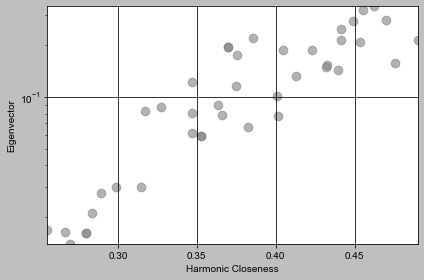

In [64]:
X = "Harmonic Closeness"
Y = "Eigenvector"
limits = pd.concat([centralities[[X, Y]].min(),
                    centralities[[X, Y]].max()], axis=1).values
centralities.plot(kind="scatter", x=X, y=Y, xlim=limits[0], ylim=limits[1],
                  s=75, logy=True, alpha=0.6)
plt.grid()
dzcnapy.plot("eig_vs_harm")

Source : Dmitry Zinoviev - Complex Network Analysis in Python